In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#creating environment 
environment_rows = 10
environment_columns = 10

q_values = np.zeros((environment_rows, environment_columns, 4))

In [3]:
#actions
actions = ['up', 'right', 'down', 'left']

In [4]:
rewards = np.full((environment_rows, environment_columns), -100)
rewards[2, 5] = 100


aisles = {}
aisles[1] = [i for i in range(1,9)]
aisles[2] = [1,2,3,4,6,7,8]
aisles[3] = [1,2,8]
aisles[4] = [i for i in range(1,9)]
aisles[5] = [i for i in range(1,9)]
aisles[6] = [i for i in range(1,9)]
aisles[7] = [i for i in range(1,9)]
aisles[8] = [i for i in range(1,9)]


for row_index in range(1, 9):
  for column_index in aisles[row_index]:
    rewards[row_index, column_index] = -1
  
for row in rewards:
  print(row)

[-100 -100 -100 -100 -100 -100 -100 -100 -100 -100]
[-100   -1   -1   -1   -1   -1   -1   -1   -1 -100]
[-100   -1   -1   -1   -1  100   -1   -1   -1 -100]
[-100   -1   -1 -100 -100 -100 -100 -100   -1 -100]
[-100   -1   -1   -1   -1   -1   -1   -1   -1 -100]
[-100   -1   -1   -1   -1   -1   -1   -1   -1 -100]
[-100   -1   -1   -1   -1   -1   -1   -1   -1 -100]
[-100   -1   -1   -1   -1   -1   -1   -1   -1 -100]
[-100   -1   -1   -1   -1   -1   -1   -1   -1 -100]
[-100 -100 -100 -100 -100 -100 -100 -100 -100 -100]


In [5]:
def is_terminal_state(current_row_index, current_column_index):
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True


def get_starting_location():
  current_row_index = np.random.randint(environment_rows)
  current_column_index = np.random.randint(environment_columns)
  while is_terminal_state(current_row_index, current_column_index):
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_columns)
  return current_row_index, current_column_index

def get_next_action(current_row_index, current_column_index, epsilon):
  if np.random.random() < epsilon:
    return np.argmax(q_values[current_row_index, current_column_index])
  else: 
    return np.random.randint(4)

def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index


def get_shortest_path(start_row_index, start_column_index):
  if is_terminal_state(start_row_index, start_column_index):
    return []
  else: 
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    while not is_terminal_state(current_row_index, current_column_index):
      action_index = get_next_action(current_row_index, current_column_index, 1.)
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])
    return shortest_path

In [6]:
epsilon = 0.9 
discount_factor = 0.9 
learning_rate = 0.2
sum_train = 0
reward_list = list()

for episode in range(1000):
  row_index, column_index = get_starting_location()

  while not is_terminal_state(row_index, column_index):
    action_index = get_next_action(row_index, column_index, epsilon)

    old_row_index, old_column_index = row_index, column_index 
    row_index, column_index = get_next_location(row_index, column_index, action_index)
    
    
    reward = rewards[row_index, column_index]
    reward_list.append(reward)
    sum_train += rewards[row_index, column_index]
    old_q_value = q_values[old_row_index, old_column_index, action_index]
    temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

   
    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Training complete!')

Training complete!


Average reward for training:  60.451


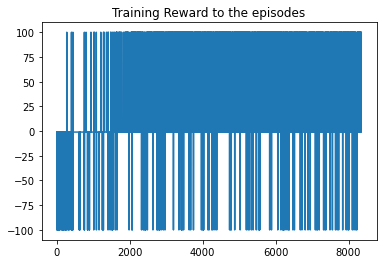

In [7]:
average_train_reward = sum_train / 1000
print("Average reward for training: ", average_train_reward)
#print(reward_list)
plt.title("Training Reward to the episodes")
plt.plot(reward_list)
plt.show()

In [8]:
print("After Trainning")
print(get_shortest_path(3, 8)) 
print(get_shortest_path(5, 5)) 
print(get_shortest_path(8, 5)) 

After Trainning
[[3, 8], [2, 8], [2, 7], [2, 6], [2, 5]]
[[5, 5], [5, 4], [5, 3], [5, 2], [4, 2], [3, 2], [2, 2], [2, 3], [2, 4], [2, 5]]
[[8, 5], [8, 4], [7, 4], [7, 3], [7, 2], [6, 2], [5, 2], [4, 2], [3, 2], [2, 2], [2, 3], [2, 4], [2, 5]]


In [9]:
epsilon = 0.9 
discount_factor = 0.9 
learning_rate = 0.2
sum_test = 0


for episode in range (500):
  row_index, column_index = get_starting_location()

  while not is_terminal_state(row_index, column_index):
    action_index = get_next_action(row_index, column_index, epsilon)

    old_row_index, old_column_index = row_index, column_index 
    row_index, column_index = get_next_location(row_index, column_index, action_index)
    
    
    reward = rewards[row_index, column_index]
    sum_test += rewards[row_index, column_index]
    old_q_value = q_values[old_row_index, old_column_index, action_index]
    temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

   
    new_q_value = old_q_value + (learning_rate * temporal_difference)
    #q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Testing complete!')

Testing complete!


In [10]:
average_testing_reward = sum_test / 500
print("Average reward for testing: ", average_testing_reward)

Average reward for testing:  75.406


In [11]:
print("After Testing")
print(get_shortest_path(3, 8)) 
print(get_shortest_path(5, 5)) 
print(get_shortest_path(8, 5)) 

After Testing
[[3, 8], [2, 8], [2, 7], [2, 6], [2, 5]]
[[5, 5], [5, 4], [5, 3], [5, 2], [4, 2], [3, 2], [2, 2], [2, 3], [2, 4], [2, 5]]
[[8, 5], [8, 4], [7, 4], [7, 3], [7, 2], [6, 2], [5, 2], [4, 2], [3, 2], [2, 2], [2, 3], [2, 4], [2, 5]]
